# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### __For comparison, Black-Scholes analytic solution:__

In this exercise, I aim to numerically verify the analytical solution to the Option Pricing problem provided by the Black-Scholes theory for the correct pricing of European Call and Put options. This theory assumes that the price evolution of an asset over time is stochastic and exhibits behavior similar to that of a Geometric Brownian Motion (GBM) with a constant risk-free interest rate (equivalent to the Brownian drift) and volatility.

__Background__

In finance, an option is a contract between two (or more) parties where one party assumes an obligation while the other can exercise a right. The simplest option is the European option: the seller (say, A) grants the buyer (B) the right to buy or sell a certain asset at a fixed price at a specified future date (contract expiration). Note that only A is bound by the contract, whereas B can choose to exercise the right to sell or buy the asset only if it results in a profit.

__The Black-Scholes Model__

According to the Black-Scholes theory, the price of an asset $S(t)$ starts at an initial value $S(0)$​ and varies over time as:

$$S(t)=S(0)e^{(μ−\frac{σ^2}{2})t+σ \Delta W(t)}$$

where $\Delta W(t) = Z \sqrt{t}$ is the standard Brownian Motion or Wiener Process with $Z \sim \mathcal{N}(0,1)$ (direct sampling).

Moreover, since the increments of $W(t)$ are independent and normally distributed, we can recursively sample according to the law:

$$S(t_i+1)=S(t_i)e^{(μ−\frac{σ^2}{2})Δt_{i+1}+σZ_i \sqrt{Δt_{i+1}}}$$

where $Z_i$​ is a standard normal random variable and $t_{i+1}=t_i+Δt$ (discrete sampling)


__Objective__

For both the direct and discrete cases, I want to calculate the prices of Call and Put options, discounting back to the initial time after simulating the final price $S_T$​. These prices are given by:

- Call Price = $e^{−rT} max⁡[0,ST−K]$
- Put Price = $e^{−rT} max⁡[0,K−ST]$

where the max operation reflects B's freedom to exercise the option or not, and the exponential factor accounts for the comparison with the interest rate applied by a bank to a hypothetical deposit made at the initial time (as an alternative to purchasing the option).

__Simulation Parameters__

For both simulations, I use the following parameters:
```bash
Asset Price at t=0: S(0)​ = 100
Expiration Time: T = 1
Strike Price: K = 100
Risk-Free Interest Rate: r = 0.1
Volatility: σ = 0.25
```
This setup allows for a comprehensive evaluation of the Black-Scholes model through numerical simulations, verifying its predictions for European Call and Put options.


In [1]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### __Direct Sampling__

Direct sampling involves directly estimating the value of the asset at the maturity time $T$. Specifically, by evaluating the Geometric Brownian motion with drift $\mu$ and volatility $\sigma$:
$$S(t)=S_0e^{(μ−\frac{σ^2}{2})t+σW(t)}$$
, where $S(T)$ represents the estimated asset value at time $T$. The study on direct sampling was conducted by considering $N=100$ blocks of length $L=10^4$. The results show the trend of the progressive mean as the number of blocks increases, for both Call options and Put options.

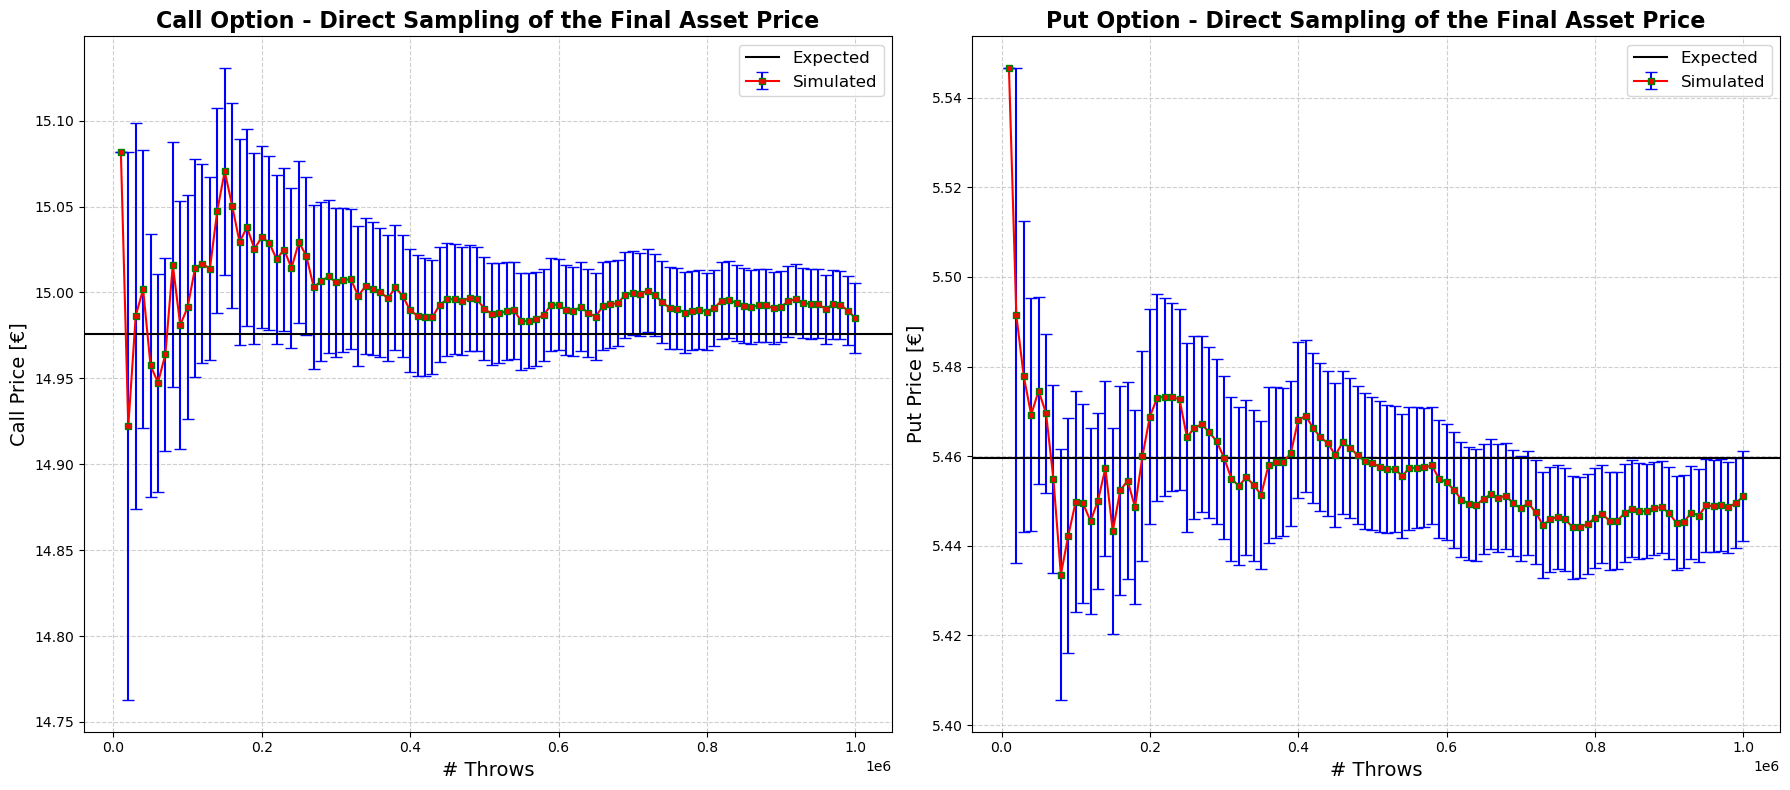

In [5]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data for Call option
x_call, y_call, error_call = np.loadtxt("data/Call_direct.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plot Call option data with error bars
ax1.errorbar(x_call, y_call, yerr=error_call, label='Simulated', color='red', ecolor='blue', capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
ax1.axhline(y=call, color='black', linestyle='-', label='Expected')  
ax1.set_xlabel('# Throws', fontsize=14)
ax1.set_ylabel('Call Price [€]', fontsize=14)
ax1.set_title('Call Option - Direct Sampling of the Final Asset Price', fontsize=16,fontweight='bold')

# Load data for Put option
x_put, y_put, error_put = np.loadtxt("data/Put_direct.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plot Put option data with error bars
ax2.errorbar(x_put, y_put, yerr=error_put, label='Simulated', color='red', ecolor='blue', capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=put, color='black', linestyle='-', label='Expected')
ax2.set_xlabel('# Throws', fontsize=14)
ax2.set_ylabel('Put Price [€]', fontsize=14)
ax2.set_title('Put Option - Direct Sampling of the Final Asset Price', fontsize=16,fontweight='bold')

# Enhance the grid and legend for both subplots
for ax in fig.get_axes():
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=12)

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()

### __Discrete Sampling__

Discrete sampling involves dividing the interval $[0,T]$ into $100$ subintervals. This allows us to evaluate the asset value at different points: $S(t_1​), S(t_2), \dots, S(T)$, which is the asset value at maturity time $T$. The estimates at these different time points are given by a recursive formula:
$$ S(t_{i+1})=S(t_i) e^{(μ−\frac{σ^2}{2})\frac{T}{100}+σ Z_{i+1}\sqrt{\frac{T}{100}}}$$

The study on discrete sampling was conducted by considering $N=100 $ blocks of length $L=10000$.

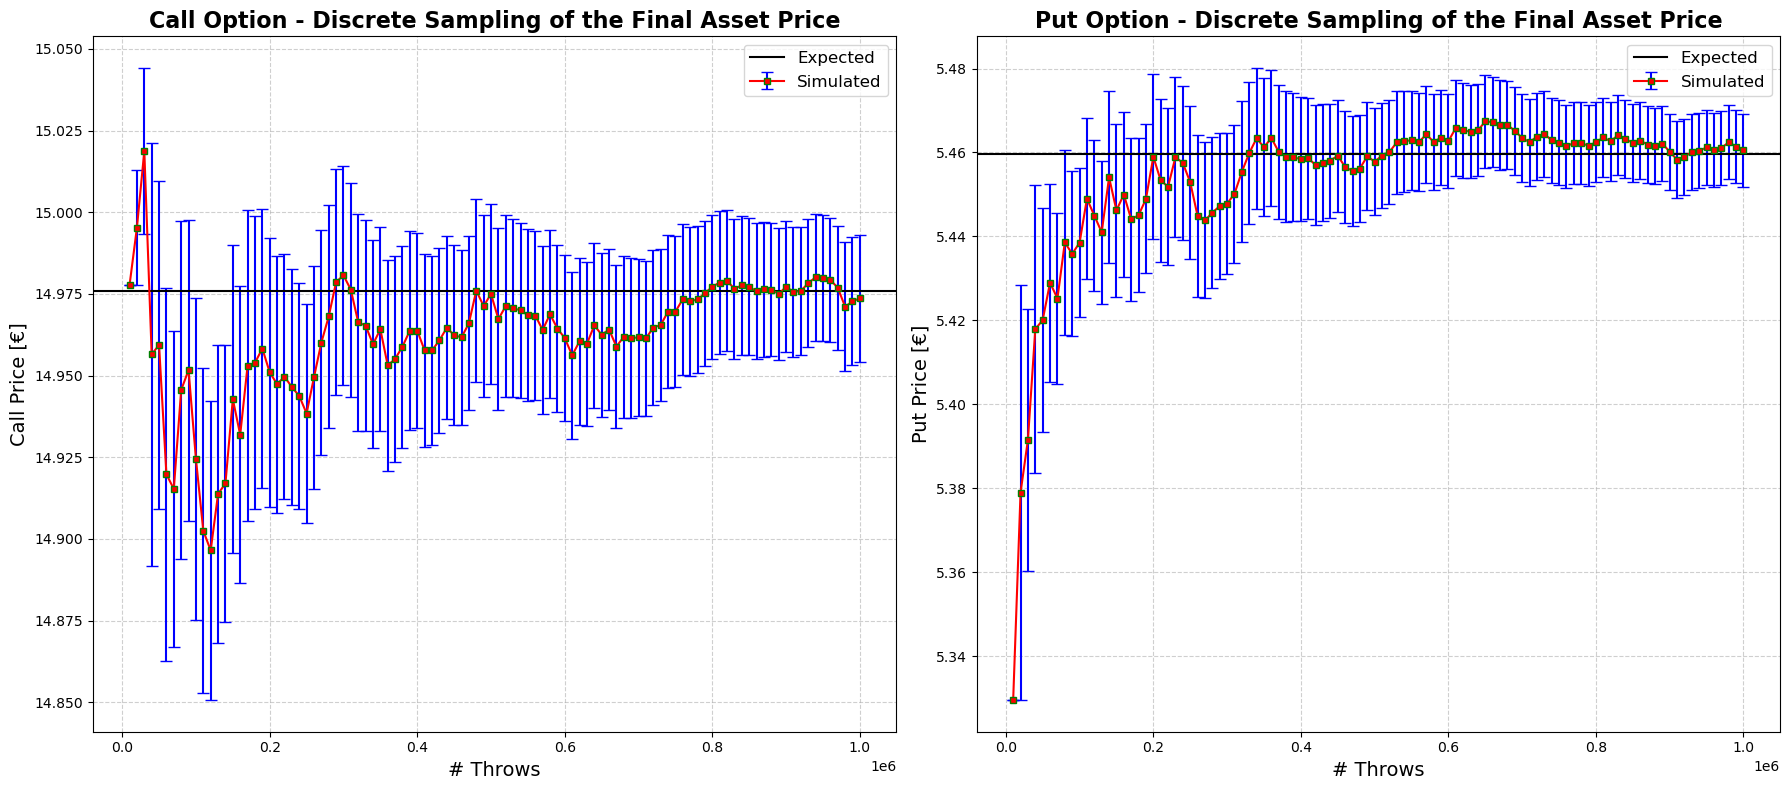

In [6]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data for Call option
x_call, y_call, error_call = np.loadtxt("data/Call_discrete.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plot Call option data with error bars
ax1.errorbar(x_call, y_call, yerr=error_call, label='Simulated', color='red', ecolor='blue', capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
ax1.axhline(y=call, color='black', linestyle='-', label='Expected')  
ax1.set_xlabel('# Throws', fontsize=14)
ax1.set_ylabel('Call Price [€]', fontsize=14)
ax1.set_title('Call Option - Discrete Sampling of the Final Asset Price', fontsize=16,fontweight='bold')

# Load data for Put option
x_put, y_put, error_put = np.loadtxt("data/Put_discrete.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Plot Put option data with error bars
ax2.errorbar(x_put, y_put, yerr=error_put, label='Simulated', color='red', ecolor='blue', capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=put, color='black', linestyle='-', label='Expected')
ax2.set_xlabel('# Throws', fontsize=14)
ax2.set_ylabel('Put Price [€]', fontsize=14)
ax2.set_title('Put Option - Discrete Sampling of the Final Asset Price', fontsize=16,fontweight='bold')

# Enhance the grid and legend for both subplots
for ax in fig.get_axes():
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=12)

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()

__Observation__

What i observe is that there is a high level of agreement between the simulation results and the values predicted by the Black-Scholes theory. Both sampling have roughly the same variance at the end. This is linked to fractal (self-similar)  proprieties of Geometric Brownian Motion, meaning that its statistical characteristics are similar at different scales.
Because both methods ultimately reflect the same underlying GBM process, their final variances are indeed expected to match.  